# <center><span style="color:red">Case Study: Attack Detection</span></center>

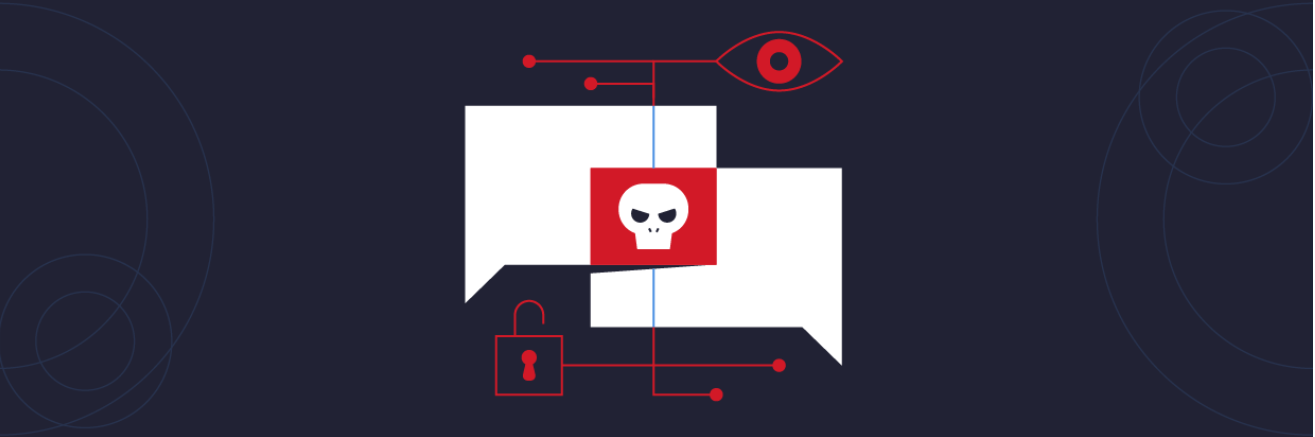

## NoteBook Objectives🎯
### 1-Be able to detect whether the packets are attacked or normal
### 2-Comparison between Some of SVM Kernels:-
   - Linear
   - RBF
   - polynomial
   
### Comparison Objectives:
  Compare the different kernel functions in terms of Accuracy, Usage, integrated Hyperparameters.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#Encoding
from sklearn.preprocessing import LabelEncoder
#scaling
from sklearn.preprocessing import RobustScaler
#SVM Model
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [3]:
DF=pd.read_csv('dataset_task/NSL_KDD_Train.csv')
DF.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


## Data first look

In [4]:
nRow, nCol = DF.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 125972 rows and 42 columns


In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised'
,'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count'
,'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'
,'dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome'])

In [6]:
DF.columns = columns

In [7]:
DF.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [8]:
DF.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [10]:
DF.describe().round(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.00,1.259720e+05,1.259720e+05,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,...,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00,125972.00
mean,287.15,4.556710e+04,1.977927e+04,0.00,0.02,0.00,0.20,0.00,0.40,0.28,...,182.15,115.65,0.52,0.08,0.15,0.03,0.28,0.28,0.12,0.12
std,2604.53,5.870354e+06,4.021285e+06,0.01,0.25,0.01,2.15,0.05,0.49,23.94,...,99.21,110.70,0.45,0.19,0.31,0.11,0.44,0.45,0.31,0.32
min,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.00,10.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,4.400000e+01,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,255.00,63.00,0.51,0.02,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,2.760000e+02,5.160000e+02,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,255.00,255.00,1.00,0.07,0.06,0.02,1.00,1.00,0.00,0.00
max,42908.00,1.379964e+09,1.309937e+09,1.00,3.00,3.00,77.00,5.00,1.00,7479.00,...,255.00,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Eploring The Data


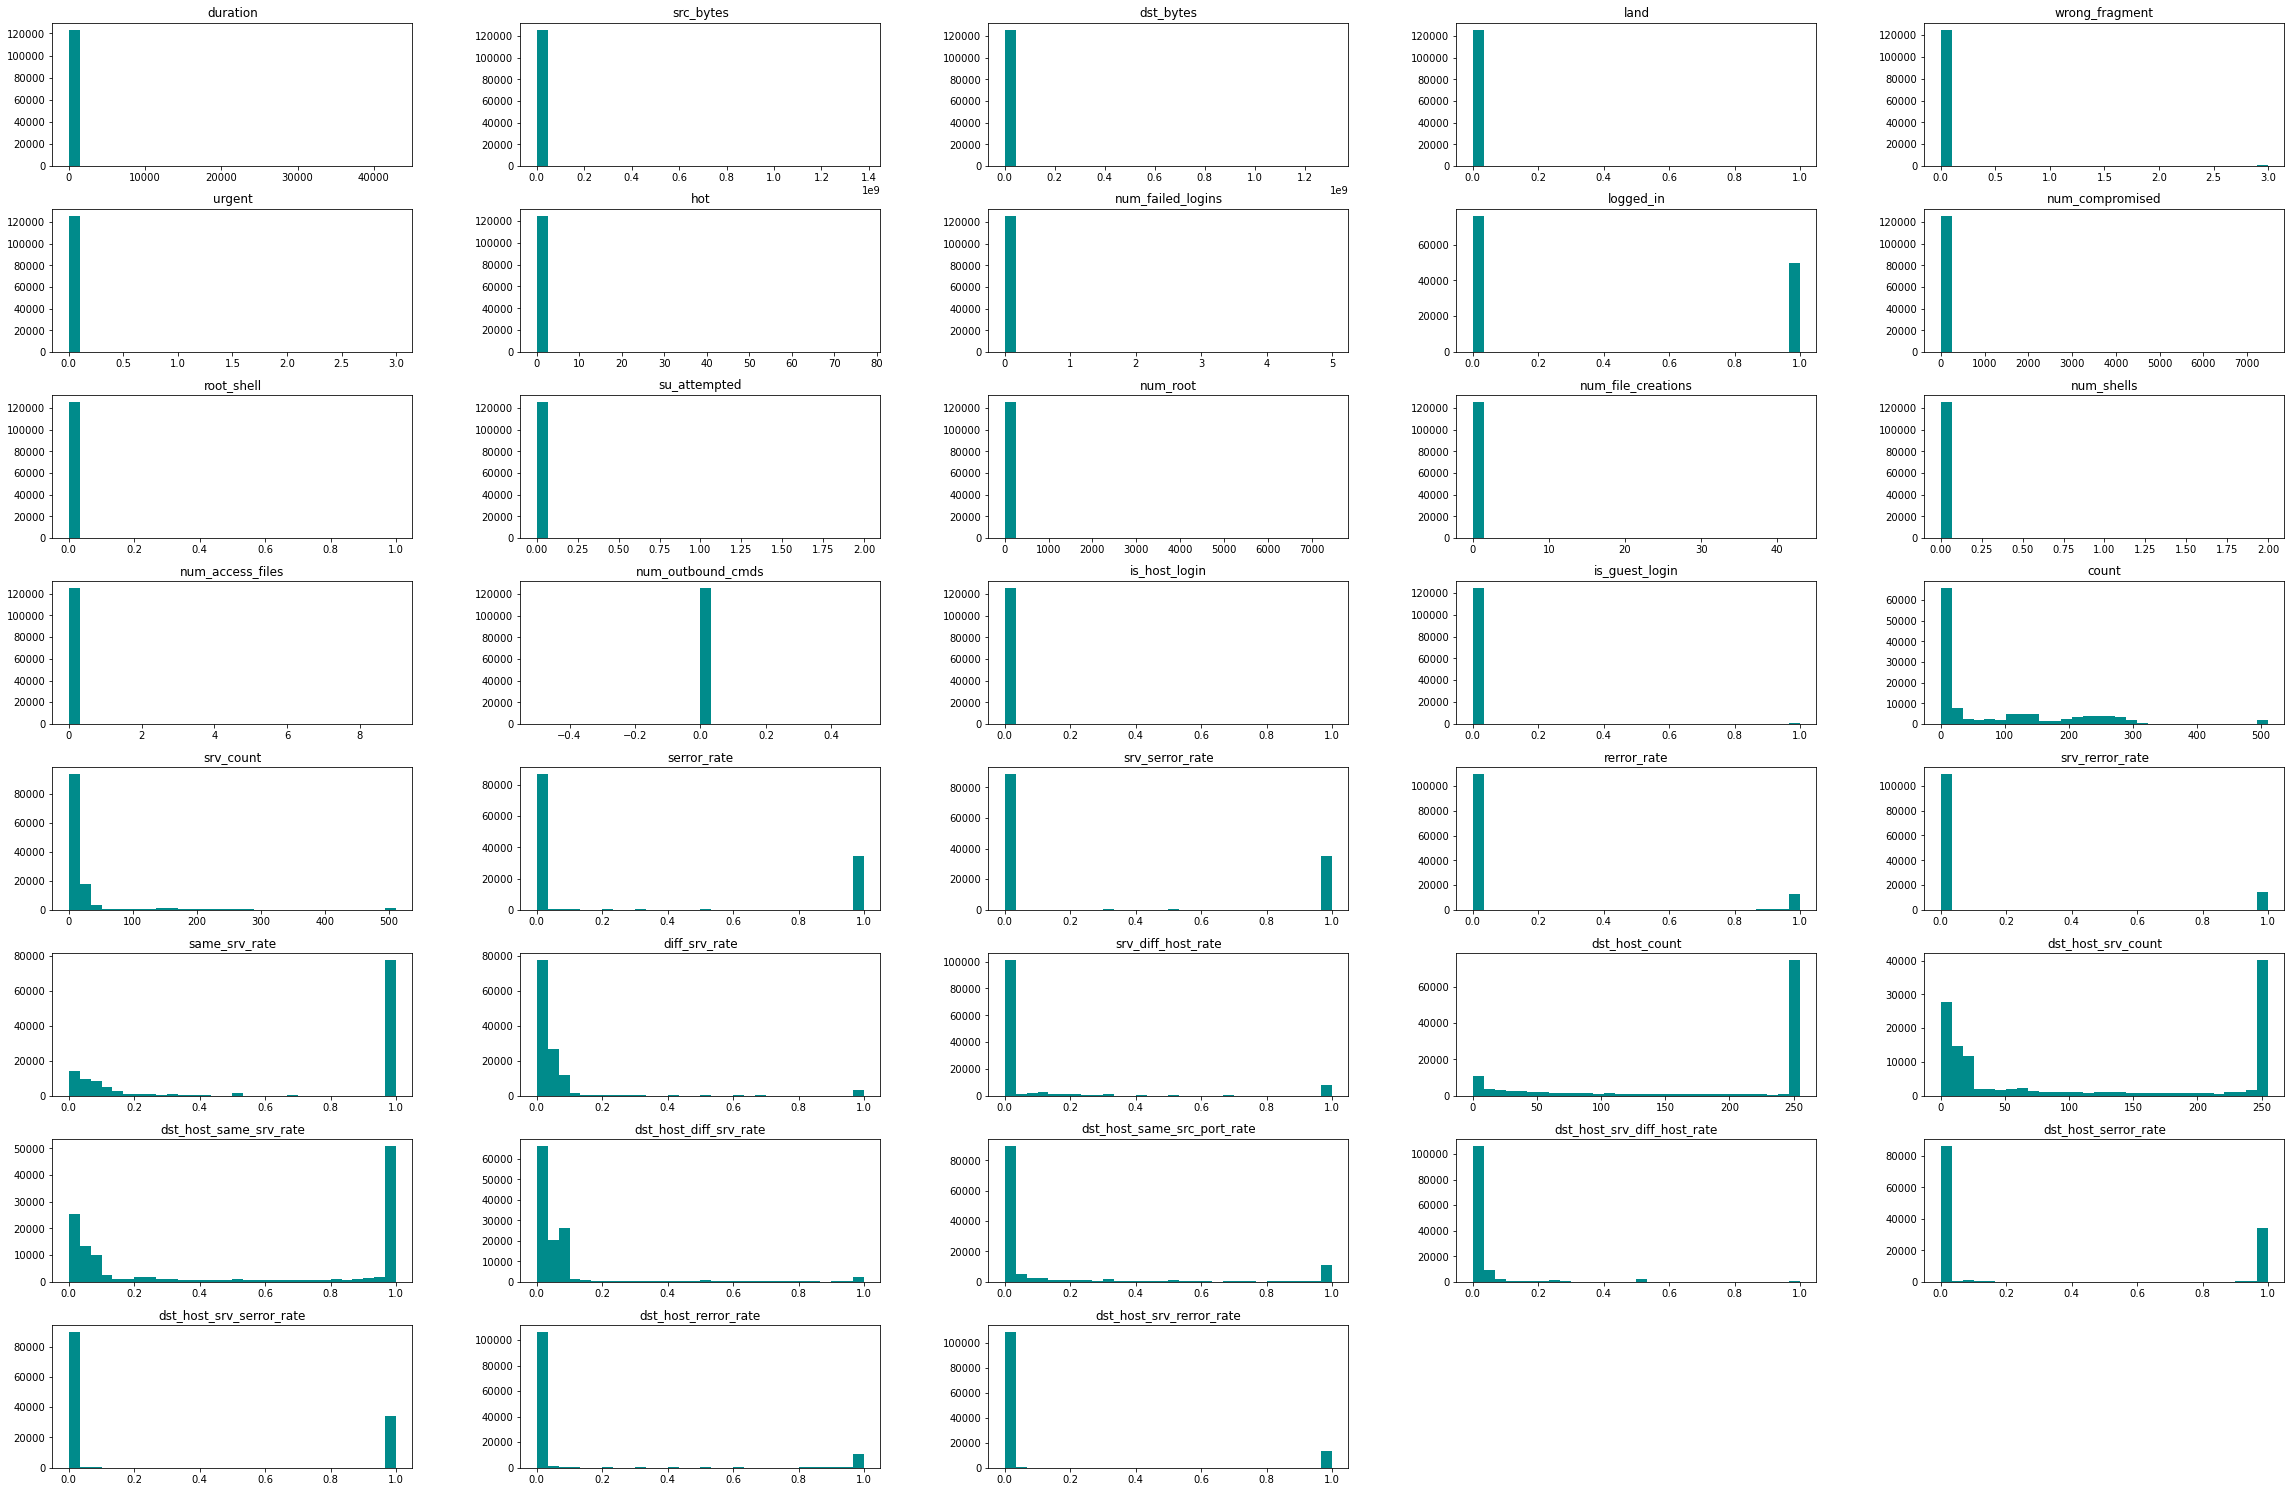

In [11]:
DF.hist(bins = 30 , layout = (9,5), figsize = (40,30)  ,column = DF.columns[0:], color= "DarkCyan", grid = False)
plt.show()

### Comment:
Notice that the lots of features, Have only one value, hence, It will be dropped when modeling since it provides imbalanced pieces of information

In [12]:
DF_corr= DF.corr()

<AxesSubplot:>

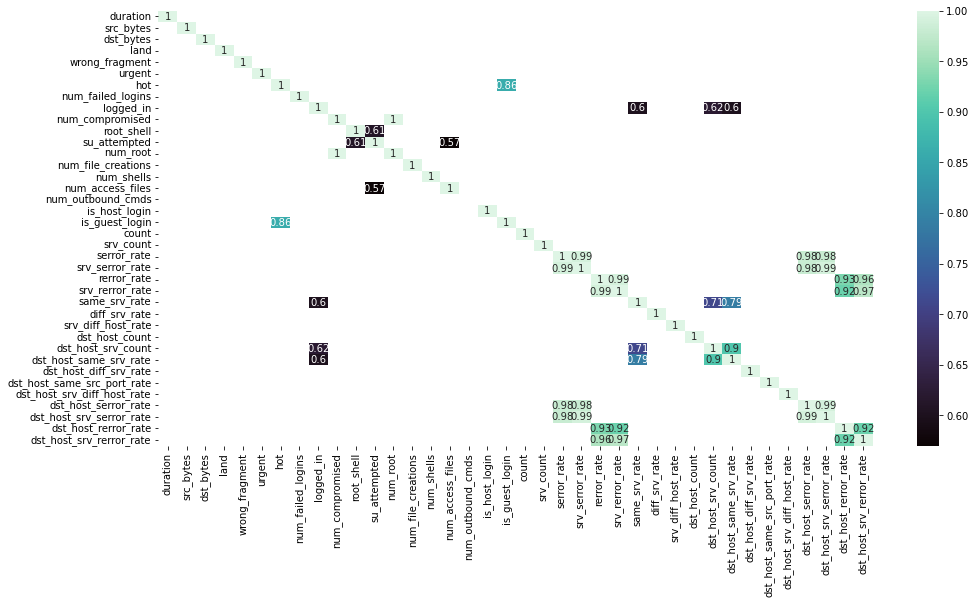

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(round(DF_corr,2),mask = DF_corr < 0.5,annot=True,cmap = 'mako')

In [14]:
#Split numerical-categorical Features
numerical_col = DF.select_dtypes(exclude=np.object_)
categorical_col = DF.select_dtypes(exclude=np.number)

In [15]:
numerical_col=numerical_col.drop(["duration","src_bytes",'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins','num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',"count"],axis = 1)

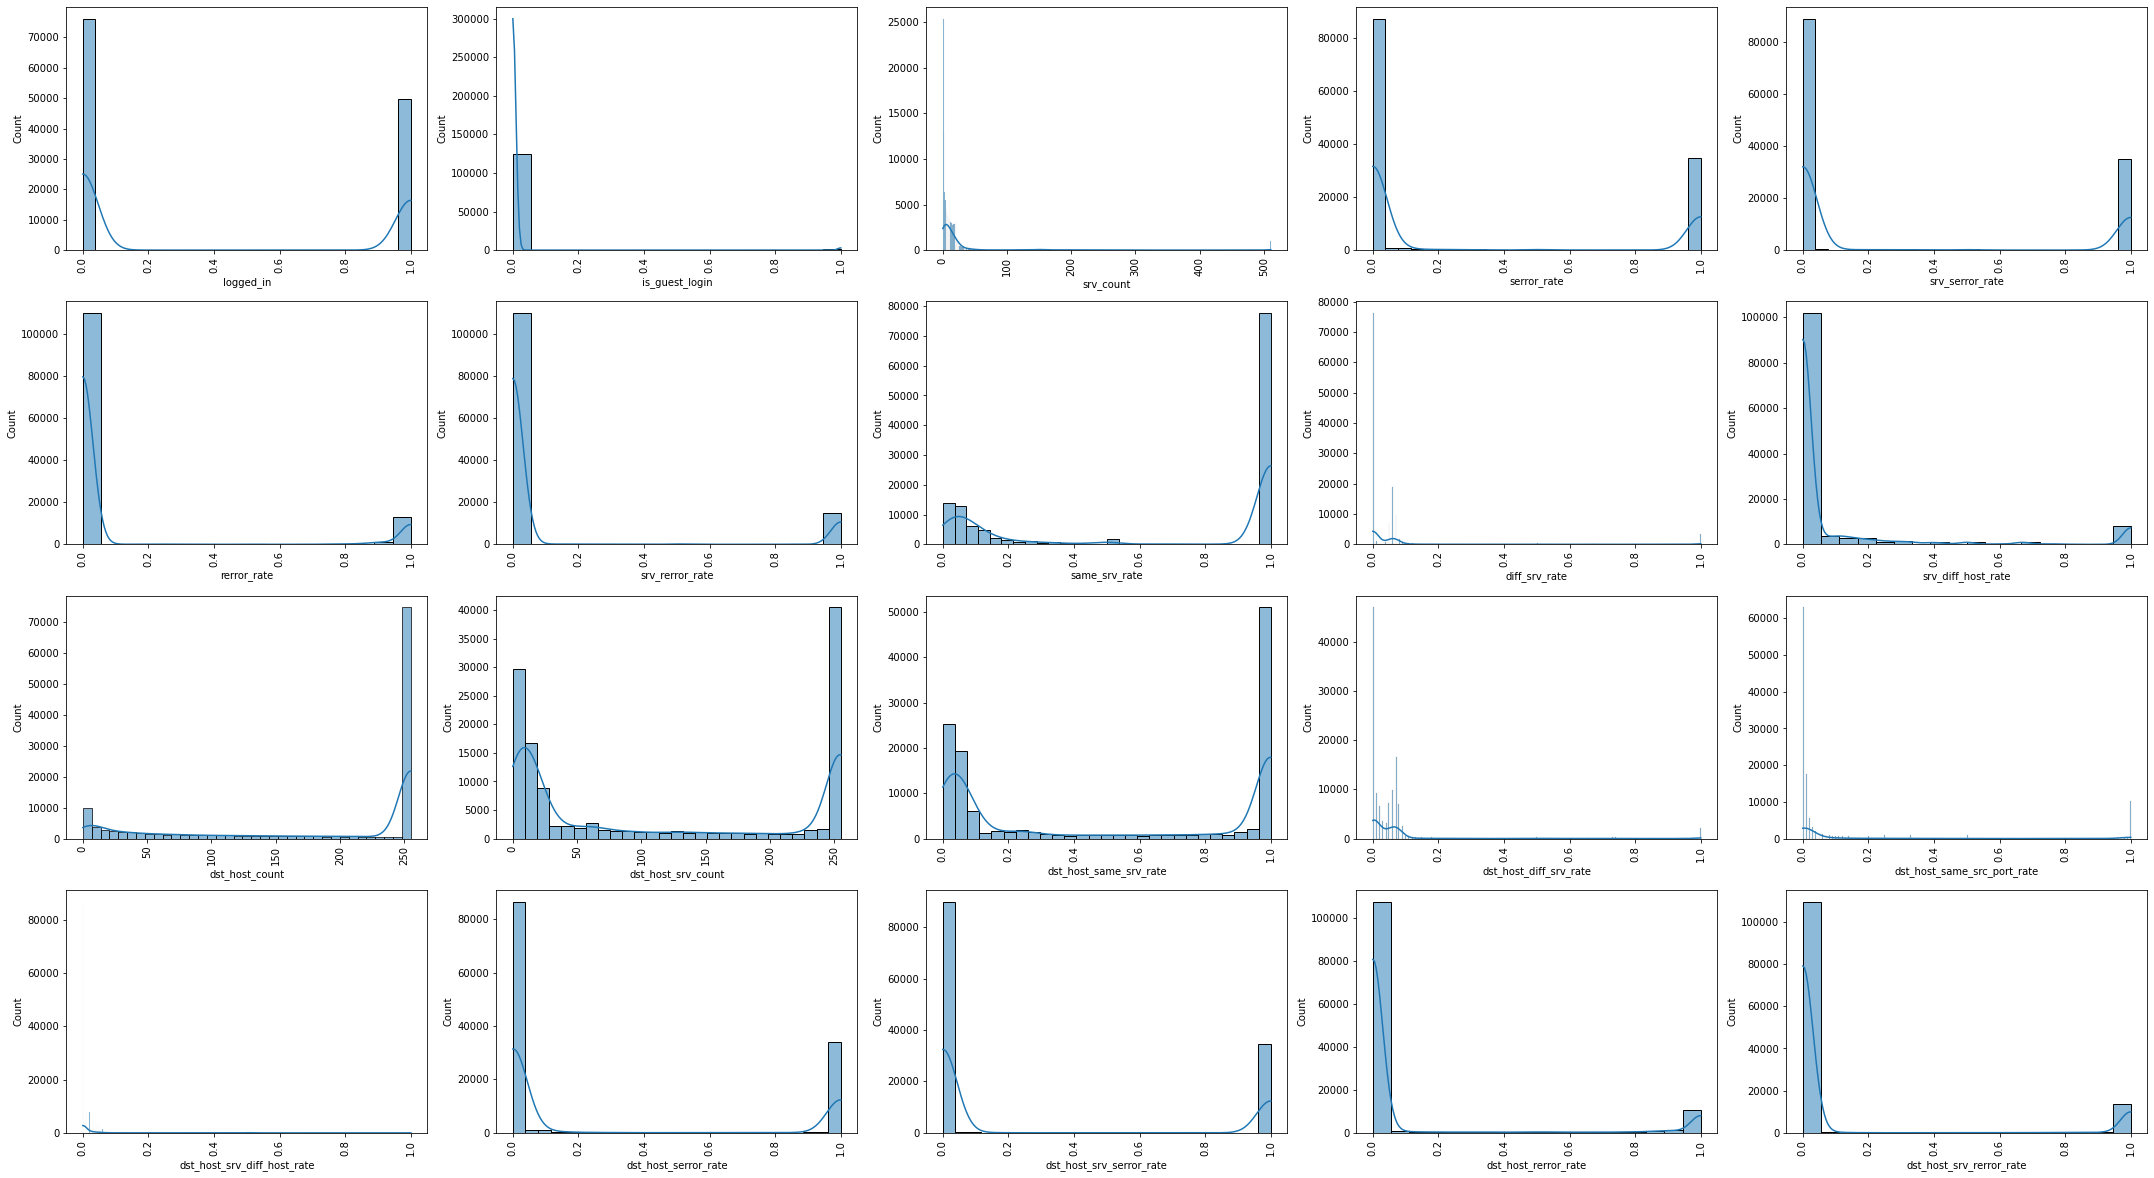

In [16]:
plt.figure(figsize=(30,20))
for index,column in enumerate(numerical_col):
    plt.subplot(5,5,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

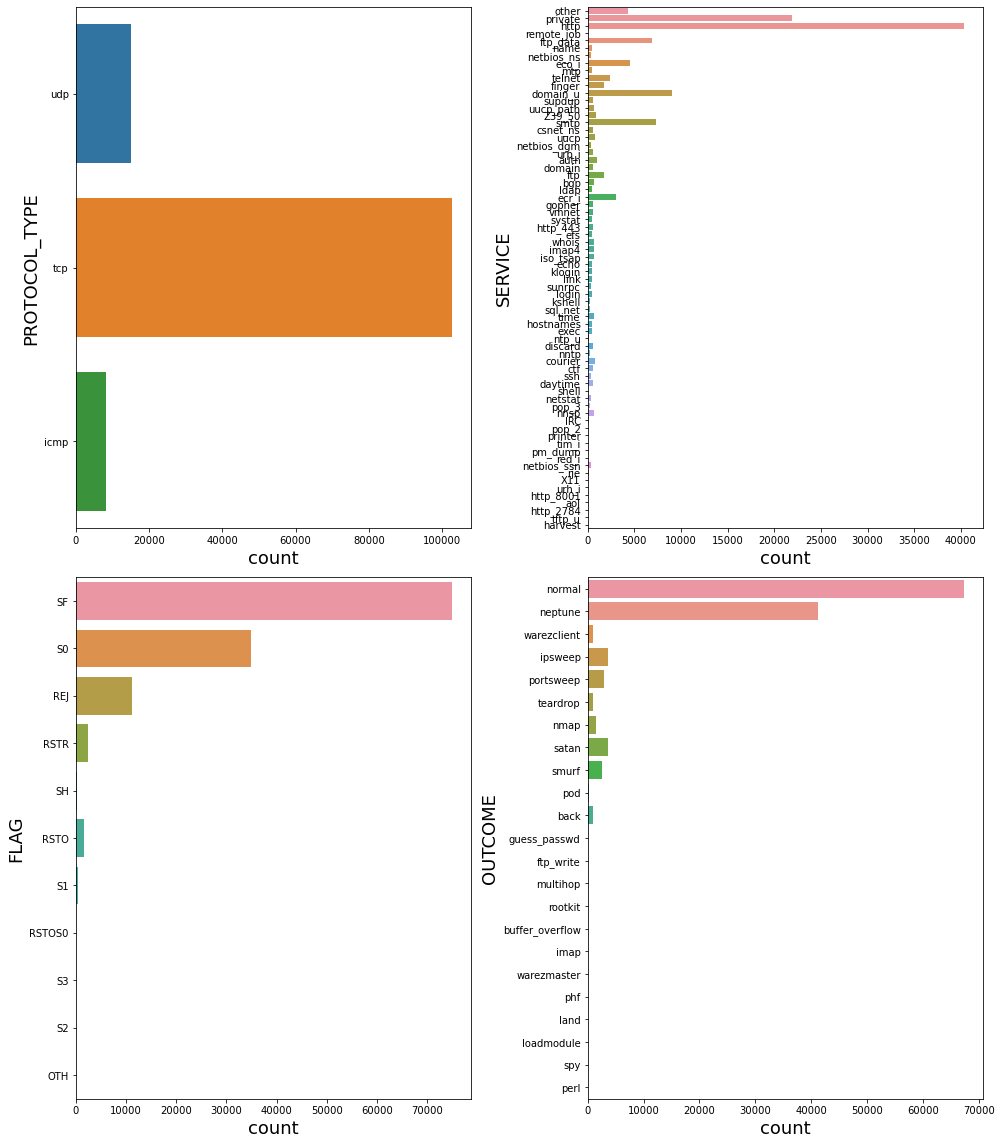

In [17]:
plt.figure(figsize=(14,16))
for index,column in enumerate(categorical_col):
    plt.subplot(2,2,index+1)
    sns.countplot(data=categorical_col,y=column)
    plt.ylabel(column.upper(),fontsize=18)
    plt.xlabel("count", fontsize=18)

plt.tight_layout(pad = 1.0)
plt.show()

In [18]:
DF['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [19]:
DF['normal_simplified'] = DF['outcome'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack')

In [20]:
DF['normal_simplified'].unique()

array(['Normal', 'Attack'], dtype=object)

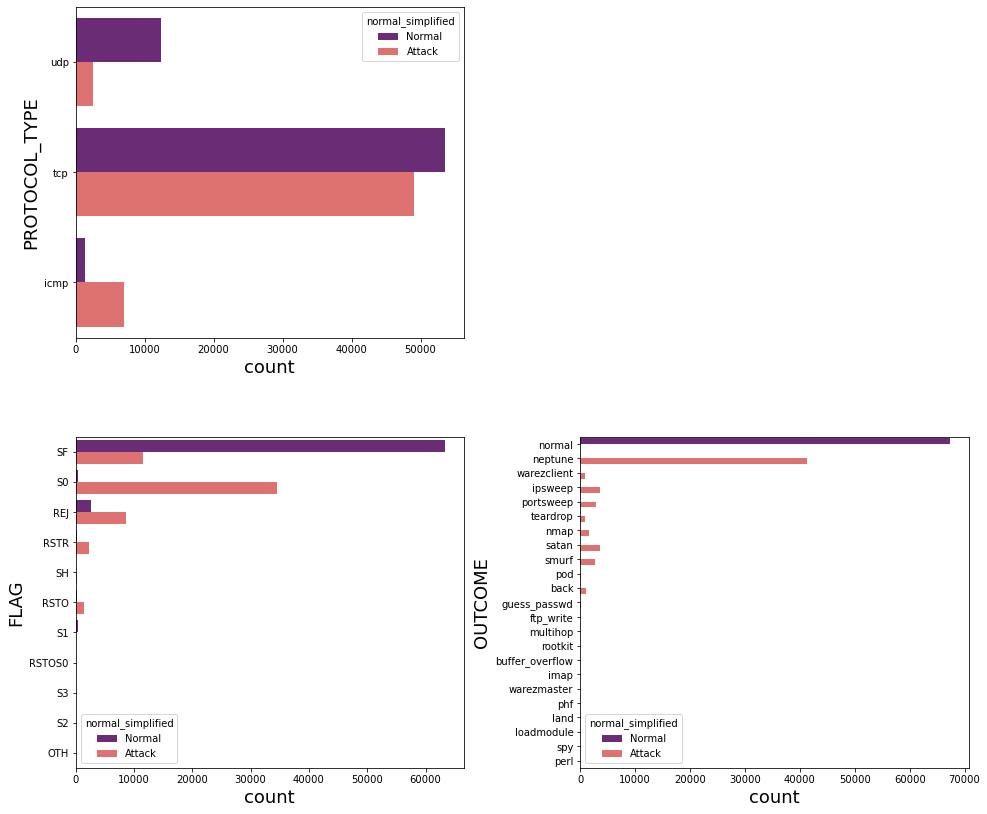

In [21]:
Cat_col=categorical_col.columns
fig = plt.figure(figsize=(16,14))
for index in range(len(Cat_col)):
    if Cat_col[index] != 'service':
        plt.subplot(2,2,index + 1)
        sns.countplot(data = categorical_col,y=Cat_col[index],hue=DF['normal_simplified'], palette ="magma")
        plt.ylabel(Cat_col[index].upper(),fontsize=18)
        plt.xlabel("count", fontsize=18)
        plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

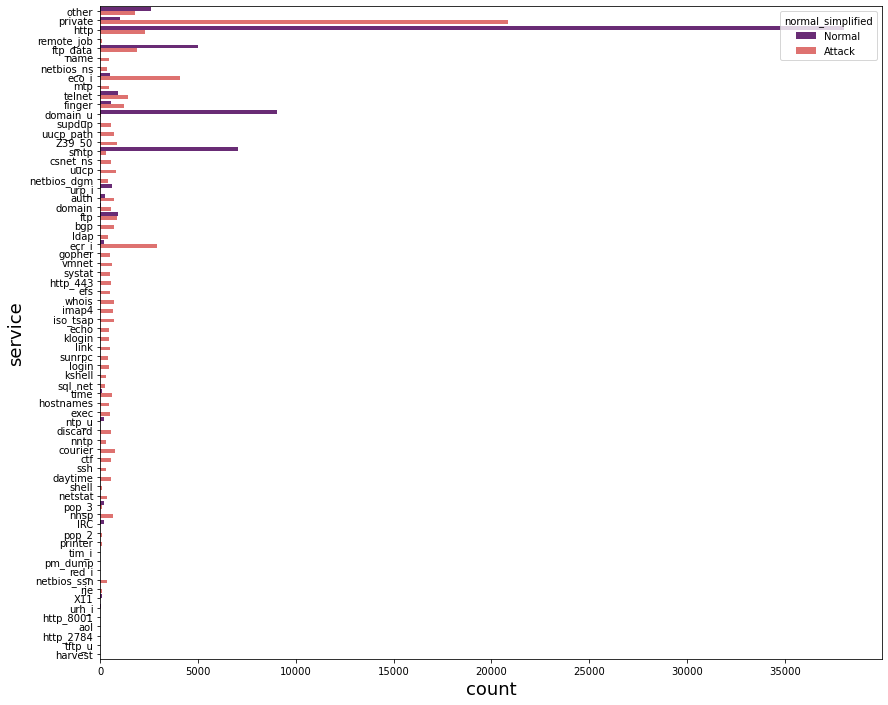

In [22]:
plt.figure(figsize=(14,12))
sns.countplot(data = DF,y='service',hue=DF['normal_simplified'], palette ="magma") 
plt.ylabel("service", fontsize=18)
plt.xlabel("count", fontsize=18)

plt.show()

In [23]:
len(numerical_col.columns)

20

In [24]:
numerical_col.columns

Index(['logged_in', 'is_guest_login', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

### Comment:
I divided the numerical columns into 4 quarter ,so that it will be better vizualized

In [25]:
first_quarter_numrical=DF[['logged_in', 'is_guest_login', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate']]

second_quarter_numrical=DF[['srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count']]

third_quarter_numrical=DF[['dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate']]

fourth_quarter_numrical=DF[['dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]

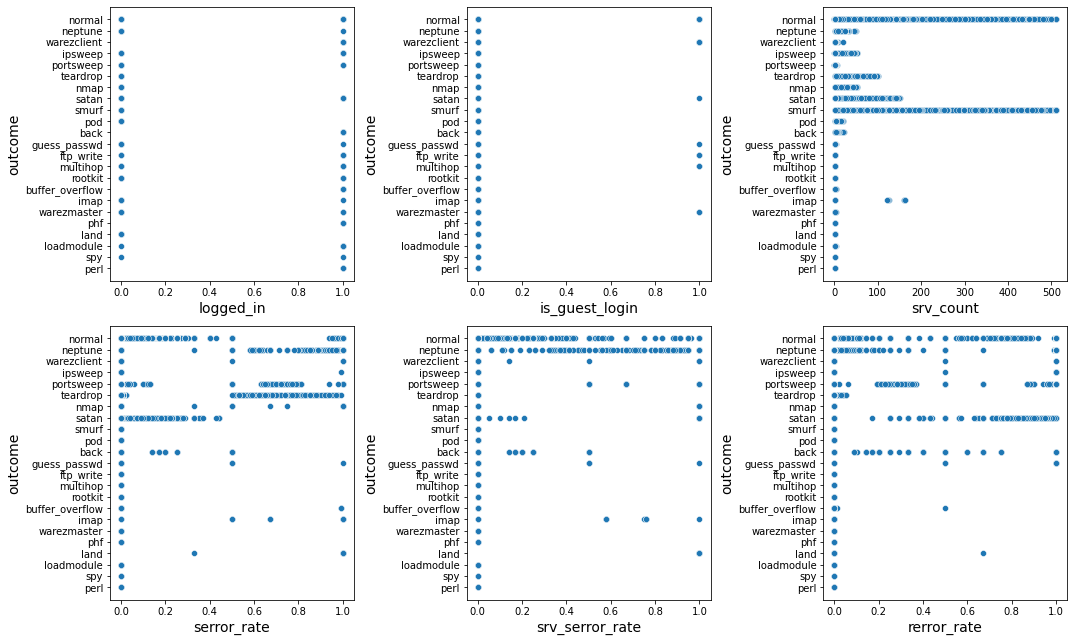

In [26]:
fig = plt.figure(figsize=(15,9))
for index in range(len(first_quarter_numrical.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = first_quarter_numrical.iloc[:,index],y=DF.outcome,data = first_quarter_numrical)
    plt.xlabel( first_quarter_numrical.columns[index], fontsize=14)
    plt.ylabel("outcome", fontsize=14)

fig.tight_layout(pad = 1.0)

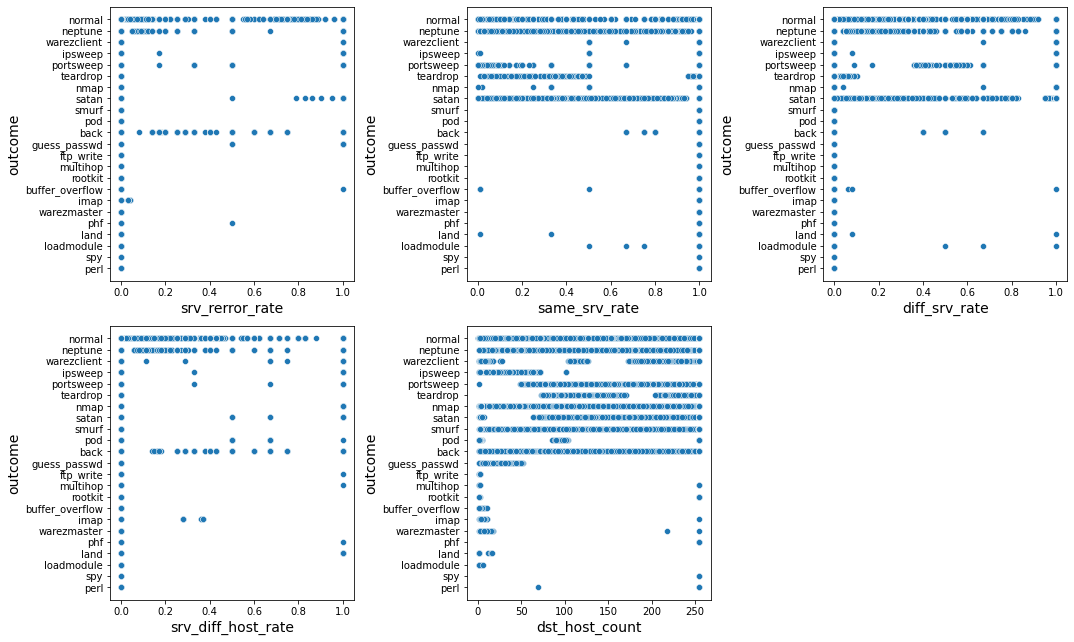

In [27]:
fig = plt.figure(figsize=(15,9))
for index in range(len(second_quarter_numrical.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = second_quarter_numrical.iloc[:,index],y=DF.outcome,data = second_quarter_numrical)
    plt.xlabel( second_quarter_numrical.columns[index], fontsize=14)
    plt.ylabel("outcome", fontsize=14)
fig.tight_layout(pad = 1.0)

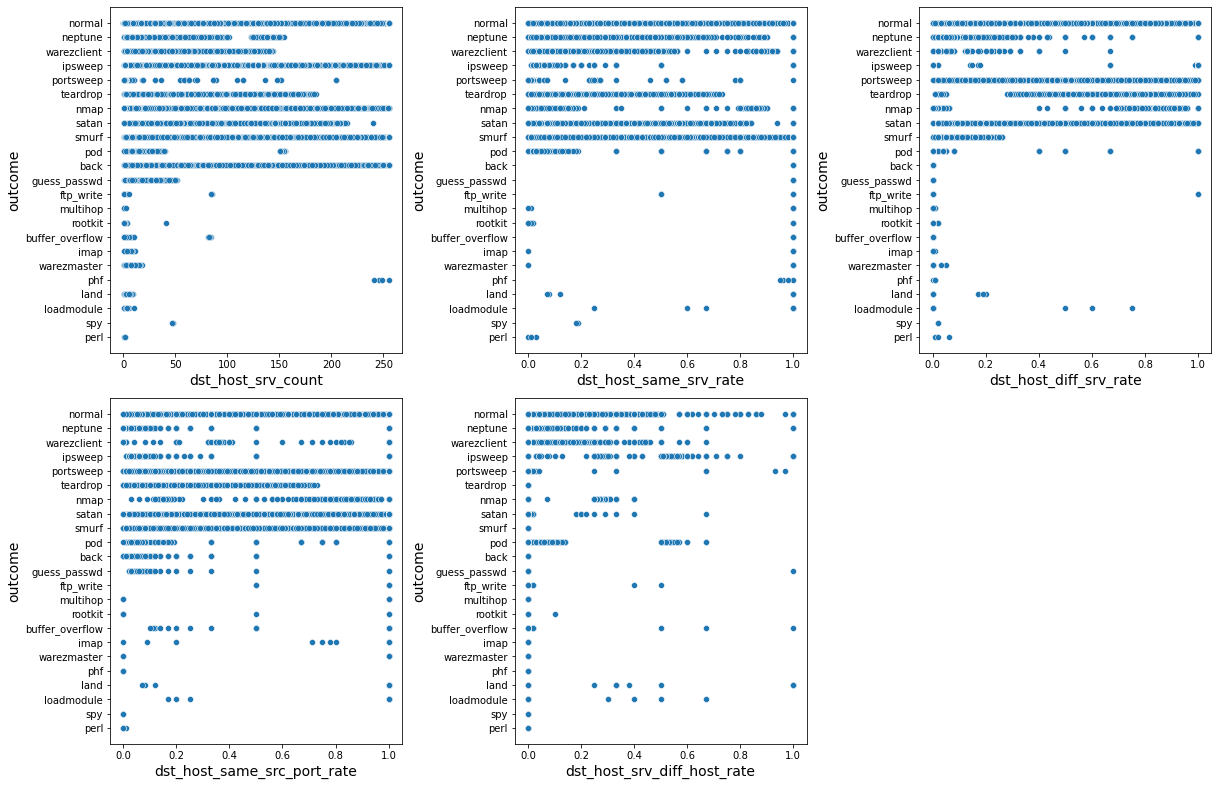

In [28]:
fig = plt.figure(figsize=(17,11))
for index in range(len(third_quarter_numrical.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = third_quarter_numrical.iloc[:,index],y=DF.outcome,data = third_quarter_numrical)
    plt.xlabel( third_quarter_numrical.columns[index], fontsize=14)
    plt.ylabel("outcome", fontsize=14)
fig.tight_layout(pad = 1.0)

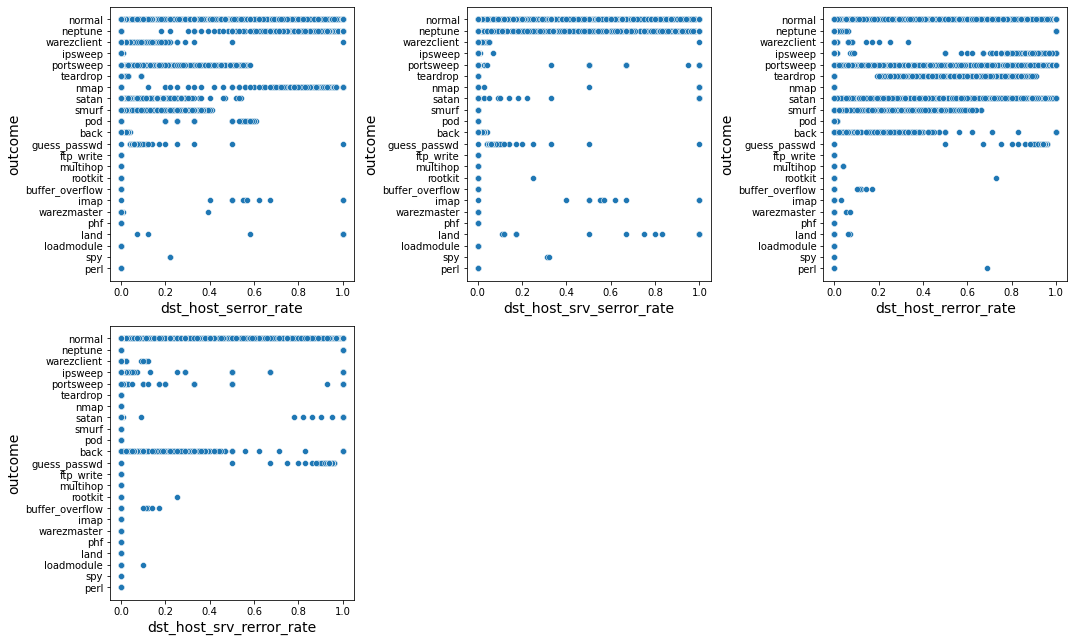

In [29]:
fig = plt.figure(figsize=(15,9))
for index in range(len(fourth_quarter_numrical.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = fourth_quarter_numrical.iloc[:,index],y=DF.outcome,data = fourth_quarter_numrical)
    plt.xlabel( fourth_quarter_numrical.columns[index], fontsize=14)
    plt.ylabel("outcome", fontsize=14)
fig.tight_layout(pad = 1.0)

### Comment:
Seem to have a decent slight outlier in our data (No need to drop any outliers), Will be fixed while scaling


## Data Pre-Processing

### Check for missing or duplicates Values


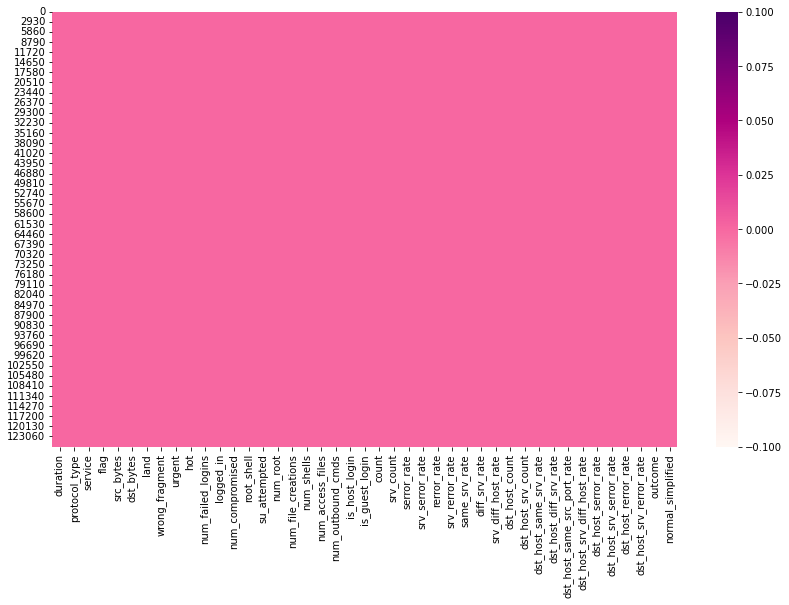

In [30]:
plt.figure(figsize=(14,8))
sns.heatmap(DF.isnull(),cmap='RdPu')
plt.show()

In [31]:
DF.duplicated().sum()

0

## Check For outliers
As we saw earlier in scatterplot, we don't have to drop any outliers

## Encoding

In [32]:
DF.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,normal_simplified
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,Attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,Attack


In [33]:
DF.drop(["duration","src_bytes",'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins','num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',"count",'outcome'],axis = 1,inplace=True)

In [34]:
DF.rename(columns={"normal_simplified": "Target"},inplace=True)

In [35]:
DF=DF.replace({'Attack': 0, 'Normal': 1})

In [36]:
DF.head()

,protocol_type,service,flag,logged_in,is_guest_login,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,udp,other,SF,0,0,1,0.0,0.0,0.0,0.0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,tcp,private,S0,0,0,6,1.0,1.0,0.0,0.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,tcp,http,SF,1,0,5,0.2,0.2,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,tcp,http,SF,1,0,32,0.0,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,tcp,private,REJ,0,0,19,0.0,0.0,1.0,1.0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [37]:
for data in DF.columns:
    if DF[data].dtype=='object':
        l_en=LabelEncoder()  
        DF[data] = l_en.fit_transform(DF[data])

In [38]:
DF.head()

,protocol_type,service,flag,logged_in,is_guest_login,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,2,44,9,0,0,1,0.0,0.0,0.0,0.0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,1,49,5,0,0,6,1.0,1.0,0.0,0.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,1,24,9,1,0,5,0.2,0.2,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,1,24,9,1,0,32,0.0,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,1,49,1,0,0,19,0.0,0.0,1.0,1.0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


## Split The Data

In [39]:
y=DF['Target']
X=DF.drop('Target',axis=1)

## Scale The Data

In [40]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

r, c = X.shape
print (f"x_train:{r} ,\t y_train:{y.shape} ")

x_train:125972 ,	 y_train:(125972,) 


#### Comment:
Necessarily Hyperparameter for Each Kernal Function
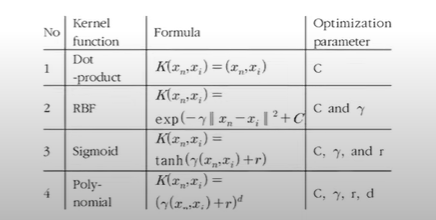

## SVM Model

#### SVM model with liner kernel

In [58]:
SVM_best = SVC(kernel='linear', C=1.0)
SVM_best.fit(X, y)

SVC(kernel='linear')

#### SVM model with RBF kernel

In [41]:
# Create a SVC classifier using an RBF kernel
SVM_rbf = SVC(kernel='rbf', C=1.0,gamma=.01)
# Train the classifier
SVM_rbf.fit(X, y)

SVC(gamma=0.01)

#### SVM model with ploy-nomial kernel

In [50]:
SVM_ploy = SVC(kernel='poly', degree=3)
SVM_ploy.fit(X, y)

SVC(kernel='poly')

## Test the Model with the Test dateset

In [42]:
DF_test=pd.read_csv('dataset_task/NSL_KDD_Test.csv')
DF_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [43]:
nRow, nCol = DF_test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 22543 rows and 42 columns


## Pre-process the Test Dataset 
#### Comment:
we do the exact same preprocess for the testing data, as we did for the training dataset, that the model learned based on it

In [44]:
DF_test.columns = columns

In [45]:
DF_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


### Check null for test dataset

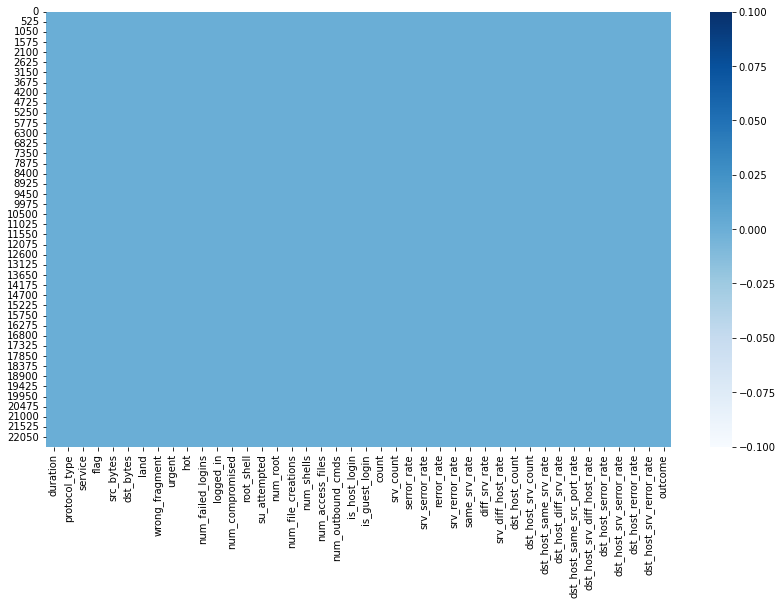

In [46]:
plt.figure(figsize=(14,8))
sns.heatmap(DF_test.isnull(),cmap='Blues')
plt.show()

In [47]:
DF_test['test_normal_simplified'] = DF_test['outcome'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack')

In [48]:
DF_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,test_normal_simplified
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,Attack
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,Normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,Attack
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,Attack
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,Normal


In [49]:
DF_test.drop(["duration","src_bytes",'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins','num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',"count",'outcome'],axis = 1,inplace=True)

In [50]:
DF_test.rename(columns={"test_normal_simplified": "outcome"},inplace=True)

In [51]:
DF_test=DF_test.replace({'Attack': 0, 'Normal': 1})

In [52]:
DF_test.head()

,protocol_type,service,flag,logged_in,is_guest_login,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,tcp,private,REJ,0,0,1,0.0,0.00,1.0,1.0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,tcp,ftp_data,SF,0,0,1,0.0,0.00,0.0,0.0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
2,icmp,eco_i,SF,0,0,65,0.0,0.00,0.0,0.0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
3,tcp,telnet,RSTO,0,0,8,0.0,0.12,1.0,0.5,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
4,tcp,http,SF,1,0,4,0.0,0.00,0.0,0.0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1


### Scale the test data

In [53]:
for data in DF_test.columns:
    if DF_test[data].dtype=='object':
        l_en=LabelEncoder()  
        DF_test[data] = l_en.fit_transform(DF_test[data])

### split the test data

In [54]:
y_test=DF_test['outcome']
X_test=DF_test.drop('outcome',axis=1)

In [55]:
y_test.shape

(22543,)

In [56]:
X_test.shape

(22543, 23)

### scale the test data

In [146]:
scaler = RobustScaler()
X_test = scaler.fit_transform(X_test)


r, c = X_test.shape

print (f"x_test:{r} ,\t y_test:{y_test.shape} ")


x_test:22543 ,	 y_test:(22543,) 


## prediction Time

In [68]:
Y_predicted = SVM_best.predict(X_test)

C:\Users\chocl\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [132]:
#linear kernal
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : Y_predicted})
df.head(8)

,Y_test,Y_predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,0
6,0,1
7,1,1


In [148]:
#rbf Kernel
Y_predicted_rbf = SVM_rbf.predict(X_test)

In [149]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : Y_predicted_rbf})
df.head(8)

,Y_test,Y_predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,0
6,0,1
7,1,1


In [52]:
Y_predicted_poly = SVM_ploy.predict(X_test)

In [53]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : Y_predicted_poly})
df.head(8)

,Y_test,Y_predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,1
7,1,1


### SVMs Scores

In [61]:
#linear kernal
SVM_best.score(X, y)

0.9493061950274664

In [149]:
#RBF kernal
SVM_rbf.score(X, y)

0.9791144063760201

In [51]:
SVM_ploy.score(X, y)

0.9707077763312482

In [55]:
SVM_ploy.score(X_test, y_test)

0.7808632391429712

## Model Evaluation

#### Comment:
Evaluation was appalied on liners SVM 

In [64]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score

### Confusion Matrix

In [70]:
confusion_matrix(y_test,Y_predicted)

array([[8662, 4170],
       [1101, 8610]], dtype=int64)

C:\Users\chocl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\chocl\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


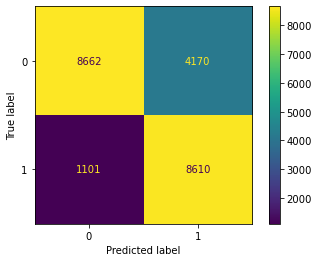

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM_best, X_test, y_test)  
plt.show()

In [71]:
print(f'SVM with RBF Kernel has a \n F1-score equals:{f1_score(y_test,Y_predicted).round(2)}\t\t recall score: {recall_score(y_test,Y_predicted).round(2)} \t\t precision score: {precision_score(y_test,Y_predicted).round(2)}')

SVM with RBF Kernel has a 
 F1-score equals:0.77		 recall score: 0.89 		 precision score: 0.67


## Computing ROC Curve and AUROC Values

In [65]:
from sklearn.metrics import roc_curve,roc_auc_score

C:\Users\chocl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\chocl\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


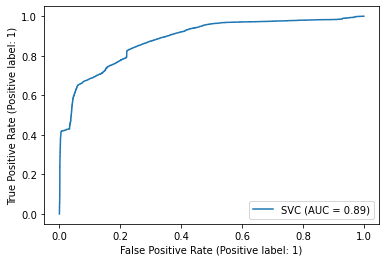

In [67]:
plot_roc_curve(SVM_best, X_test, y_test)